# Exploration on the Gradient Changes in Stiffness Map

In [1]:
# ! pip install scipy 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import scipy.ndimage

In [9]:
# load the stiffness map from the correct path 
full_path = "/home/smooi/Desktop/toast/data/toast_pipe_data/Cc_100FU/Mu.mat"

# def list_files_in_dir(mat_path):
#     # mat_file_names = []
#     try:
#         items = os.listdir(mat_path)
#         return items
#     except FileNotFoundError:
#         return f"Error. The file is not found!"
    

In [10]:
# load the EA1026_Mu.mat to visualize the data 
# dict keys: dict_keys(['__header__', '__version__', '__globals__', 'Mu'])
file_name = "Cc100_Mu.mat"
# full_path = os.path.join(mat_path, file_name)
stiff_data = scipy.io.loadmat(full_path)
mu = stiff_data["Mu"]

In [ ]:
# if "Mu" in stiff_data:
#     mu = stiff_data["Mu"]
#     print(f"The shape of the stiffness matrix is: {mu.shape}") # (160, 160, 80)
#     print("MuExp Data Type:", mu.dtype) # MuExp Data Type: float64
#     print("First 5 Values:\n", mu[:5, :5])
#     # we expected that in the edge of the Mu files 

/tmp/ipykernel_100025/815128432.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust spacing between subplots


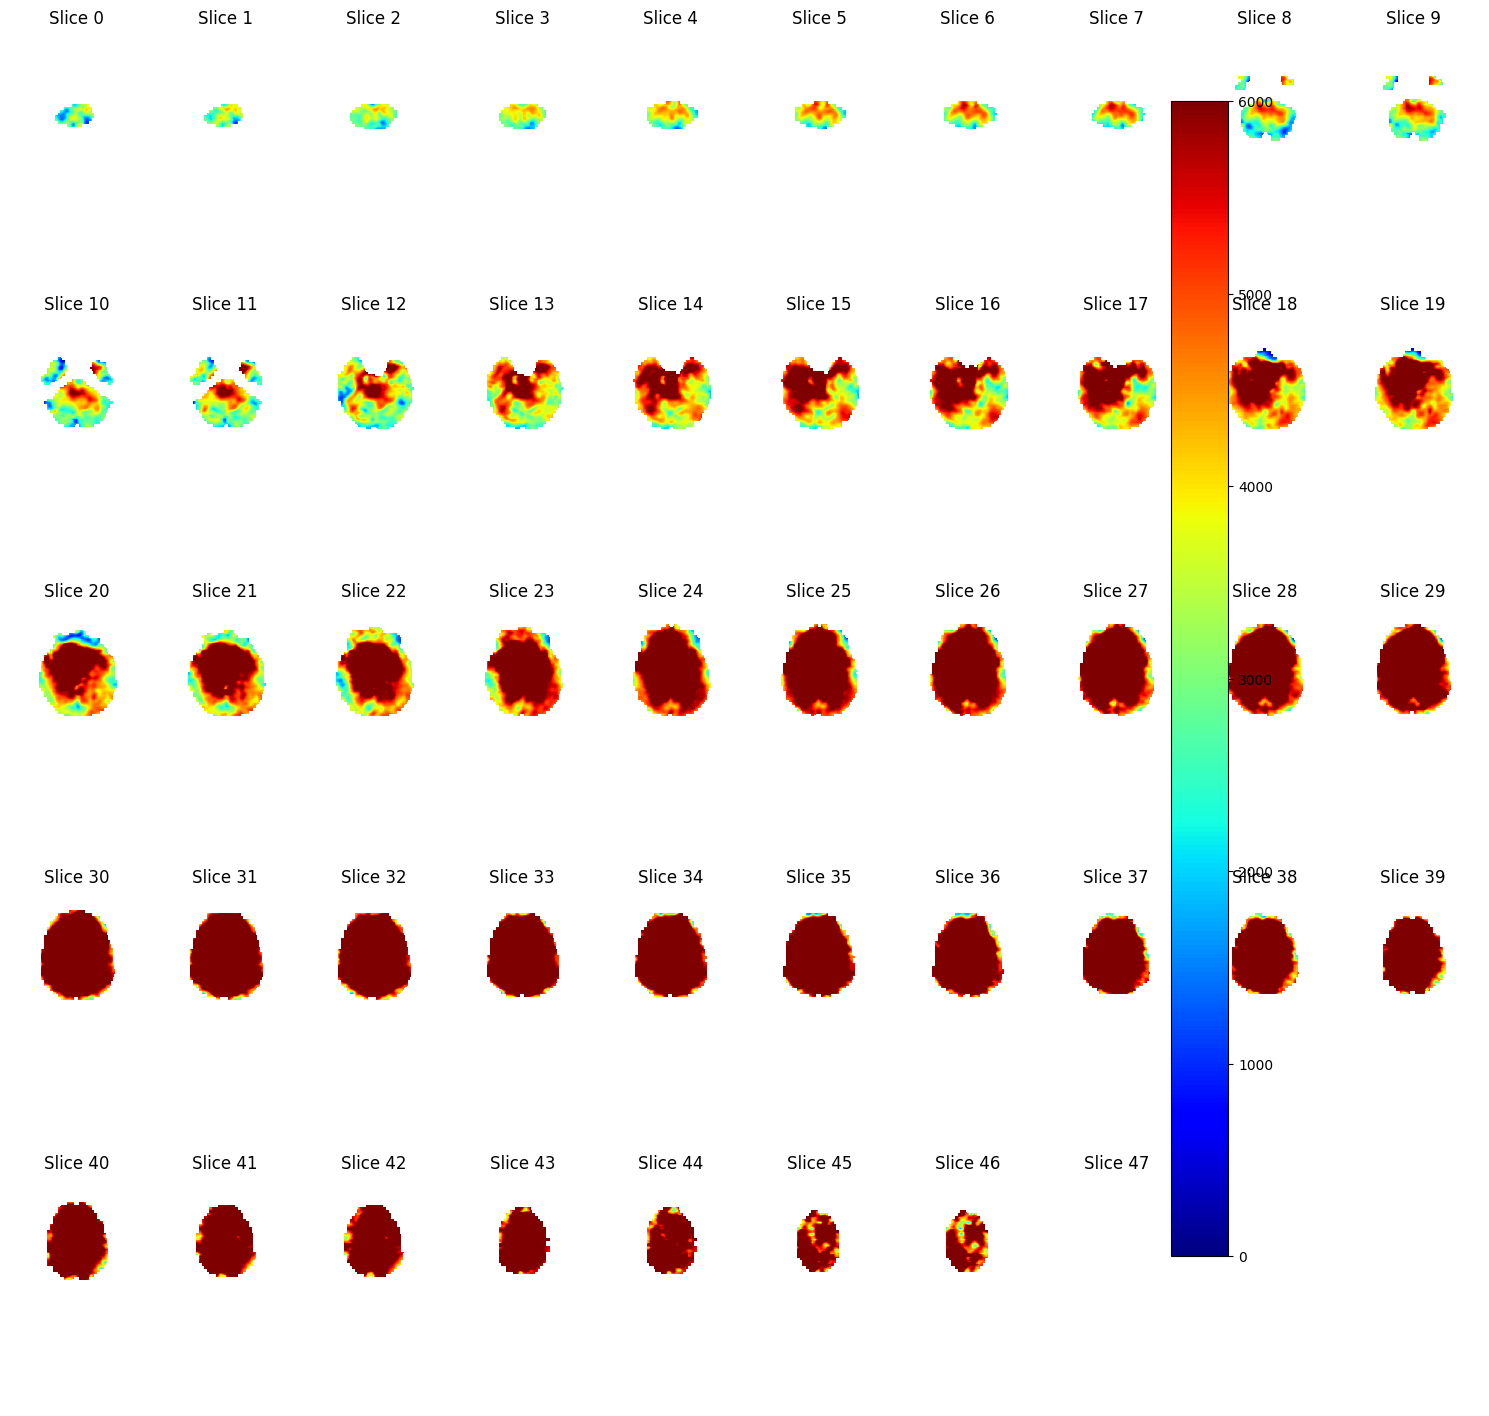

In [18]:
import matplotlib.pyplot as plt

# Number of slices in the 3rd dimension
num_slices = mu.shape[2]

# Set up a grid for subplots (e.g., 5 rows and 5 columns for a 25-slice example)
# You can adjust the number of rows and columns based on the total number of slices
rows = 5  # Adjust this based on the total number of slices
cols = (num_slices // rows) + (num_slices % rows != 0)  # Determine the number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through all slices and plot each one
for i in range(num_slices):
    axes[i].imshow(mu[:, :, i], cmap='jet', vmin=0, vmax=6000)
    axes[i].set_title(f"Slice {i}")
    axes[i].axis('off')  # Hide axis for better visual clarity

# Hide any unused axes if the number of slices is less than the total subplot grid
for j in range(num_slices, len(axes)):
    axes[j].axis('off')

# Add a colorbar for the entire grid
fig.colorbar(axes[0].imshow(mu[:, :, 0], cmap='jet', vmin=0, vmax=6000), ax=axes.ravel().tolist(), orientation='vertical')
# Adjust the layout to prevent overlap and give space for the colorbar
plt.subplots_adjust(right=0.85)  # Make space on the right side for the colorbar

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# download the plot 
# Save the plot to a file (e.g., PNG format)
fig.savefig('/home/smooi/Desktop/toast/Cc100-FU_stiffness_plot.png', bbox_inches='tight')  # Use an appropriate path


In [ ]:
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Compute the gradient map along x and y axis in 2D 
for value in slice_idx:
    selected_slice = mu[:, :, value]
    sharpened_slice = scipy.ndimage.convolve(selected_slice, sharpening_kernel, mode='reflect')
    
    grad_x = scipy.ndimage.sobel(sharpened_slice, axis=0)
    grad_y = scipy.ndimage.sobel(sharpened_slice, axis=1)
    
    grad_x_old = scipy.ndimage.sobel(selected_slice, axis=0)
    grad_y_old = scipy.ndimage.sobel(selected_slice, axis=1)
    
    sharp_grad_magnitude = np.sqrt(grad_x**2 + grad_y**2) 
    orig_grad_magnitude = np.sqrt(grad_x_old**2 + grad_y_old**2) 
    
    # Display original gradient magnitude
    plt.figure(figsize=(6,6))
    plt.imshow(orig_grad_magnitude, cmap='inferno')
    plt.colorbar(label="Gradient Magnitude")
    plt.title(f"Original Gradient Magnitude - Slice {value}")
    plt.show()
    
    # Display sharpened slice
    plt.figure(figsize=(6,6))
    plt.imshow(sharpened_slice, cmap='inferno')
    plt.colorbar(label="Sharpened Stiffness")
    plt.title(f"Sharpened Stiffness Map - Slice {value}")
    plt.show()

    # Display sharpened gradient magnitude
    plt.figure(figsize=(6,6))
    plt.imshow(sharp_grad_magnitude, cmap='inferno')
    plt.colorbar(label="Gradient Magnitude")
    plt.title(f"Sharpened Gradient Magnitude - Slice {value}")
    plt.show()
    


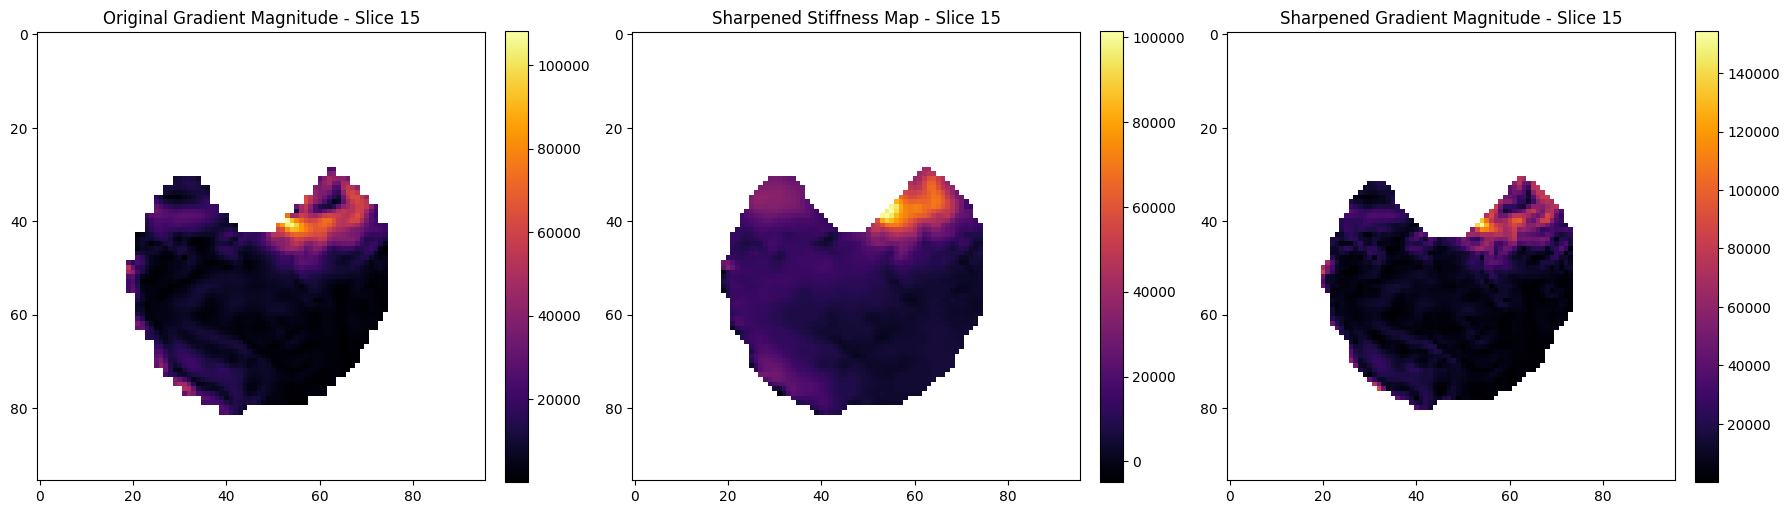

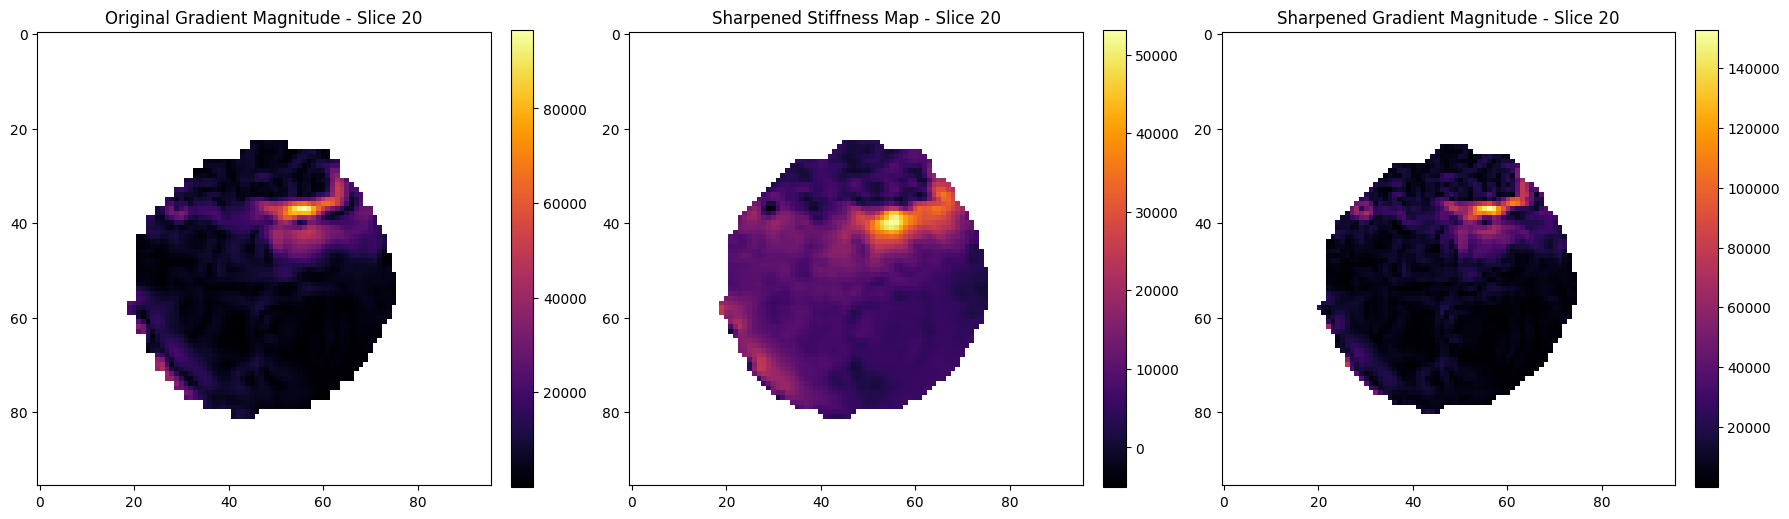

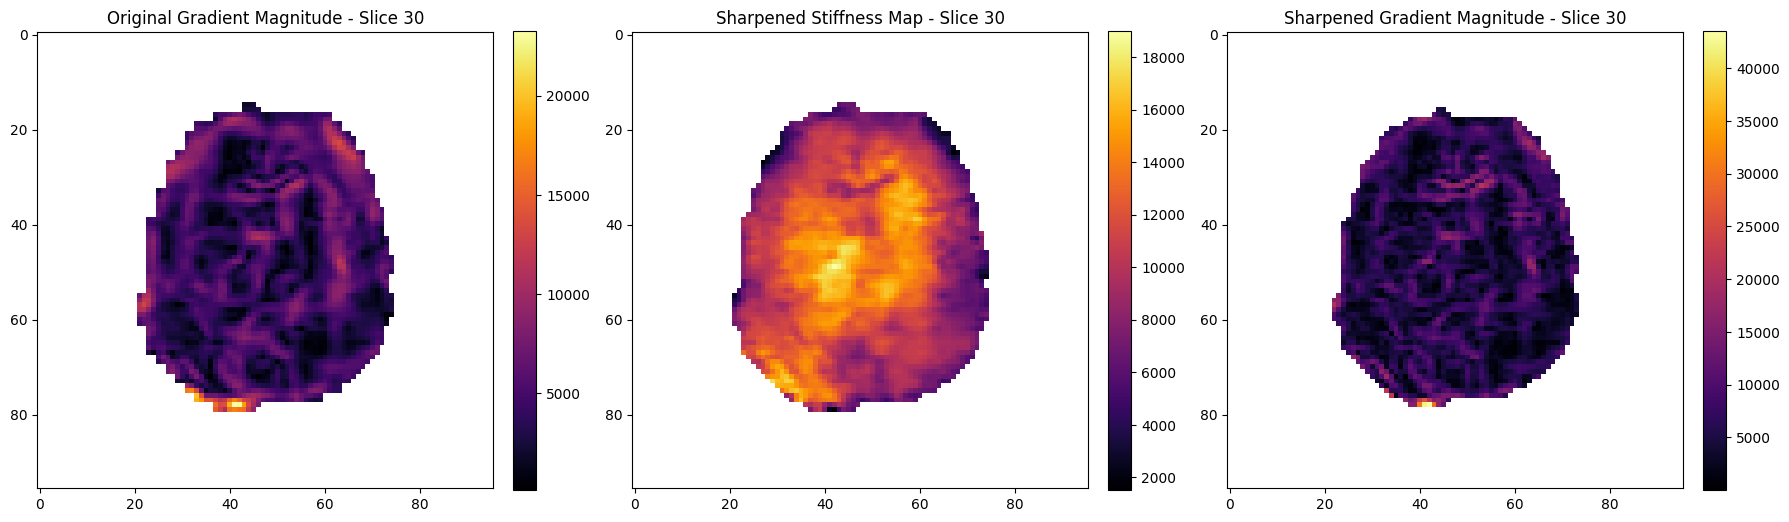

In [6]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Compute the gradient map along x and y axis in 2D
for value in slice_idx:
    selected_slice = mu[:, :, value]
    sharpened_slice = scipy.ndimage.convolve(selected_slice, sharpening_kernel, mode='reflect')
    
    grad_x = scipy.ndimage.sobel(sharpened_slice, axis=0)
    grad_y = scipy.ndimage.sobel(sharpened_slice, axis=1)
    
    grad_x_old = scipy.ndimage.sobel(selected_slice, axis=0)
    grad_y_old = scipy.ndimage.sobel(selected_slice, axis=1)
    
    sharp_grad_magnitude = np.sqrt(grad_x**2 + grad_y**2) 
    orig_grad_magnitude = np.sqrt(grad_x_old**2 + grad_y_old**2) 

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display original gradient magnitude
    im1 = axes[0].imshow(orig_grad_magnitude, cmap='inferno')
    axes[0].set_title(f"Original Gradient Magnitude - Slice {value}")
    fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

    # Display sharpened slice
    im2 = axes[1].imshow(sharpened_slice, cmap='inferno')
    axes[1].set_title(f"Sharpened Stiffness Map - Slice {value}")
    fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

    # Display sharpened gradient magnitude
    im3 = axes[2].imshow(sharp_grad_magnitude, cmap='inferno')
    axes[2].set_title(f"Sharpened Gradient Magnitude - Slice {value}")
    fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()
